In [12]:
from Tools import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import cantera as ct 
import seaborn as sns
from matplotlib.lines import Line2D

In [13]:
Detailed_gas = ct.Solution("detailed.yaml")
Reduced_gas = ct.Solution("reduced.yaml")
Optim_1 = ct.Solution("STEC_A.yaml")
Optim_100 = ct.Solution("STEC_B.yaml")

Targets = ["H2", "NH3", "O2", "OH","NO", 'H2O','NO2', 'N2O','N2']
Non_Target = ['H', 'O', 'HO2', 'N', 'N2H2', 'HNO',"NH","NH2","NNH"]
idx_target_det = spcs_name_idx(Detailed_gas,Targets)
idx_target_red = spcs_name_idx(Reduced_gas,Targets)
idx_target_optim1 = spcs_name_idx(Optim_1,Targets)
idx_target_optim100 = spcs_name_idx(Optim_100,Targets)

idx_non_target_det = spcs_name_idx(Detailed_gas,Non_Target)
idx_non_target_red = spcs_name_idx(Reduced_gas,Non_Target)
idx_non_target_optim1 = spcs_name_idx(Optim_1,Non_Target)
idx_non_target_optim100 = spcs_name_idx(Optim_100,Non_Target)

pressure = np.linspace(1,1,1).tolist()
temperature = np.linspace(1000,2000,11).tolist()
phi = np.round(np.linspace(0.5, 2.0, 8), 1).tolist()
mixture =np.linspace(0.85,0.85,1).tolist()
case = generate_test_cases_bifuel(temperature,pressure,phi,mixture)
print(case[80])

(101325.0, 2000.0, 0.5, 0.85)


/tmp/ipykernel_5737/3573305127.py:1: UserWarning: NasaPoly2::validate: 
For species OHV, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  Detailed_gas = ct.Solution("detailed.yaml")


In [14]:
Time_det = pd.read_pickle("Time_det.pkl")
Temp_det = pd.read_pickle("Temp_det.pkl")
Y_Target_det = pd.read_pickle("Y_Target_det.pkl")
Y_Non_Target_det = pd.read_pickle("Y_Non_target_det.pkl")
AI_delay_det = pd.read_pickle("AI_det.pkl")

Time_red = pd.read_pickle("Time_red.pkl")
Temp_red = pd.read_pickle("Temp_red.pkl")
Y_Target_red = pd.read_pickle("Y_Target_red.pkl")
Y_Non_Target_red = pd.read_pickle("Y_Non_target_red.pkl")
AI_delay_red = pd.read_pickle("AI_red.pkl")

Time_red_optim1 = pd.read_pickle("Time_red_optim1.pkl")
Temp_red_optim1 = pd.read_pickle("Temp_red_optim1.pkl")
Y_Target_red_optim1 = pd.read_pickle("Y_Target_red_optim1.pkl")
Y_Non_Target_red_optim1 = pd.read_pickle("Y_Non_target_red_optim1.pkl")
AI_delay_red_optim1 = pd.read_pickle("AI_red_optim1.pkl")

Time_red_optim2 = pd.read_pickle("Time_red_optim2.pkl")
Temp_red_optim2 = pd.read_pickle("Temp_red_optim2.pkl")
Y_Target_red_optim2 = pd.read_pickle("Y_Target_red_optim2.pkl")
Y_Non_Target_red_optim2 = pd.read_pickle("Y_Non_target_red_optim2.pkl")
AI_delay_red_optim2 = pd.read_pickle("AI_red_optim2.pkl")

In [15]:
Targets = ["H2", "NH3", "O2", "OH","NO", 'H2O','NO2', 'N2O','N2']
Non_Target = ['H', 'O', 'HO2', 'N', 'N2H2', 'HNO',"NH","NH2","NNH"]


In [16]:
coefficients = {
    "NO": 6.0,
    "NH": 3.5,
    "NH2": 3.5,
    "NNH": 5.0,
    "H2": 3.0,
    "NH3": 3.0,
    "O2": 3.0,
    "OH": 3.0,
    "O": 3.0,
    "H": 3.0

}
coef_non_target = 0.05



In [6]:
np.shape(Y_Target_det)

(88, 9, 100)

In [1]:
# Définir le seuil epsilon
epsilon = 1e-12

# Calcul pour les Y_target
Y_target = np.abs(np.array(Y_Target_det) - np.array(Y_Target_red)) / np.maximum(np.abs(np.array(Y_Target_det)), epsilon)

# Calcul pour les optimisations
Y_target_optim1 = np.abs(np.array(Y_Target_det) - np.array(Y_Target_red_optim1)) / np.maximum(np.abs(np.array(Y_Target_det)), epsilon)
Y_target_optim2 = np.abs(np.array(Y_Target_det) - np.array(Y_Target_red_optim2)) / np.maximum(np.abs(np.array(Y_Target_det)), epsilon)

# Calcul pour les Y_non_target
Y_non_target = np.abs(np.array(Y_Non_Target_red) - np.array(Y_Non_Target_det)) / np.maximum(np.abs(np.array(Y_Non_Target_det)), epsilon)
Y_non_target_optim1 = np.abs(np.array(Y_Non_Target_red) - np.array(Y_Non_Target_red_optim1)) / np.maximum(np.abs(np.array(Y_Non_Target_det)), epsilon)
Y_non_target_optim2 = np.abs(np.array(Y_Non_Target_red) - np.array(Y_Non_Target_red_optim2)) / np.maximum(np.abs(np.array(Y_Non_Target_det)), epsilon)

# Appliquer le mask pour tous les Y
mask_target = np.abs(Y_Target_det) < epsilon
Y_target[mask_target] = 0

mask_target_optim1 = np.abs(Y_Target_det) < epsilon
Y_target_optim1[mask_target_optim1] = 0

mask_target_optim2 = np.abs(Y_Target_det) < epsilon
Y_target_optim2[mask_target_optim2] = 0

mask_non_target = np.abs(Y_Non_Target_det) < epsilon
Y_non_target[mask_non_target] = 0

mask_non_target_optim1 = np.abs(Y_Non_Target_det) < epsilon
Y_non_target_optim1[mask_non_target_optim1] = 0

mask_non_target_optim2 = np.abs(Y_Non_Target_det) < epsilon
Y_non_target_optim2[mask_non_target_optim2] = 0


NameError: name 'np' is not defined

In [18]:
data_Target_red=[]
data_Target_optim1 =[]
data_Target_optim2 =[]

data_NonTarget_red = []
data_NonTarget_optim1 =[] 
data_NonTarget_optim2 = []
for spec in Targets+Non_Target : 
    
    if spec in coefficients : 
        k = coefficients[spec]
    else :
        k=0.05
    
    if spec in Targets : 
        ind = Targets.index(spec)
        
        data_Target_red.append( k*np.sum(np.array(Y_target[:, ind, :]).flatten()))
        data_Target_optim1.append( k*np.sum(np.array(Y_target_optim1[:, ind, :]).flatten()))
        data_Target_optim2.append( k*np.sum(np.array(Y_target_optim2[:, ind, :]).flatten()))
        
    if spec in Non_Target : 
        ind = Non_Target.index(spec)
        data_NonTarget_red.append(k*np.sum(np.array(Y_non_target[:, ind, :]).flatten())) 
        data_NonTarget_optim1.append(k*np.sum(np.array(Y_non_target_optim1[:, ind, :]).flatten()))
        data_NonTarget_optim2.append(k*np.sum(np.array(Y_non_target_optim2[:, ind, :]).flatten()))
print(np.shape(Y_target[:, 0, :].flatten()) )       
print(np.sum(data_Target_red)+np.sum(data_NonTarget_red))
print(np.sum(data_Target_optim1)+np.sum(data_NonTarget_optim1))
print(np.sum(data_Target_optim2)+np.sum(data_NonTarget_optim2))

(8800,)
225982.07314849598
101246.78597876368
494889681345.1725


In [19]:
print(np.sum(data_Target_red)+np.sum(data_NonTarget_red))
print(np.sum(data_Target_optim1)+np.sum(data_NonTarget_optim1))
print(np.sum(data_Target_optim2)+np.sum(data_NonTarget_optim2))

225982.07314849598
101246.78597876368
494889681345.1725


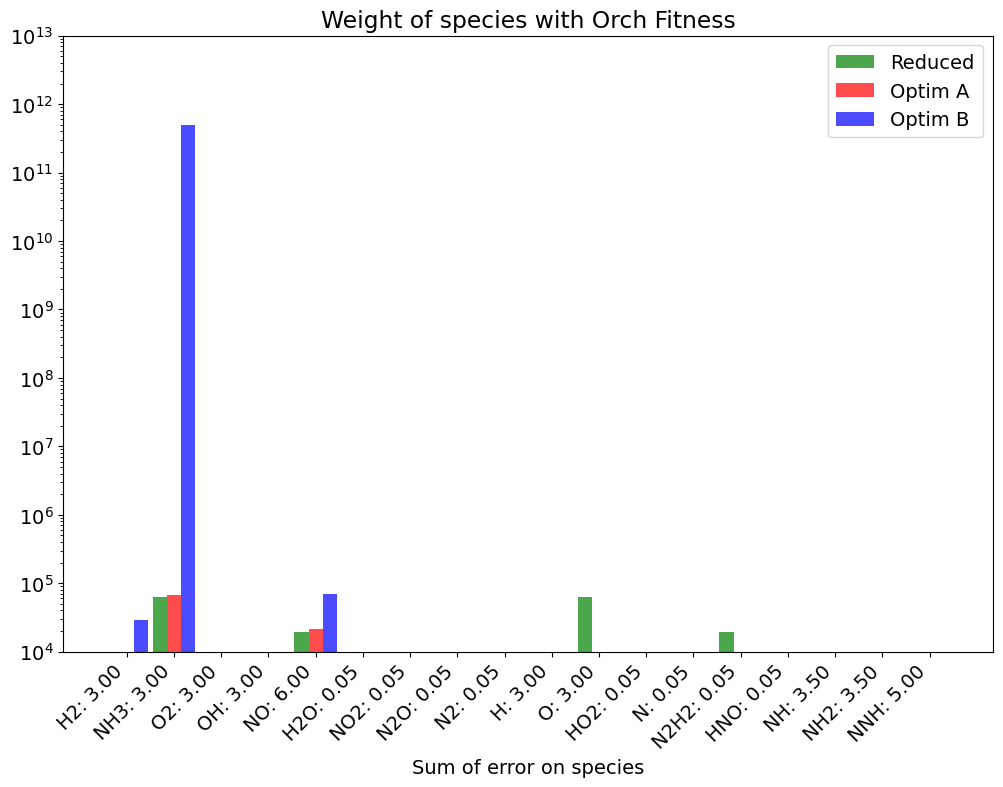

In [27]:
plt.rcParams.update({'font.size': 14}) 
# Définir la largeur des barres
bar_width = 0.3

# Définir les positions des barres pour éviter le chevauchement
positions_1 = [i - bar_width for i in range(len(Targets + Non_Target))]
positions_2 = [i for i in range(len(Targets + Non_Target))]
positions_3 = [i + bar_width for i in range(len(Targets + Non_Target))]

# Dictionnaire des coefficients
coefficients = {
    "NO": 6.0,
    "NH": 3.5,
    "NH2": 3.5,
    "NNH": 5.0,
    "H2": 3.0,
    "NH3": 3.0,
    "O2": 3.0,
    "OH": 3.0,
    "O": 3.0,
    "H": 3.0
}

# Coefficient par défaut pour les espèces non présentes
coef_non_target = 0.05

# Agrandir la figure pour plus d'espace (ajuster la taille selon le besoin)
plt.figure(figsize=(12, 8))  # Largeur et hauteur de la figure en pouces

# Ploter les barres avec des transparences pour bien les voir
bars_1 = plt.bar(positions_1, data_Target_red + data_Target_red, width=bar_width, alpha=0.7, label='Reduced', color="green")
bars_2 = plt.bar(positions_2, data_Target_optim1 + data_NonTarget_optim1, width=bar_width, alpha=0.7, label='Optim A', color="red")
bars_3 = plt.bar(positions_3, data_Target_optim2 + data_NonTarget_optim1, width=bar_width, alpha=0.7, label='Optim B ', color="blue")

# Modifier les labels de l'axe X pour inclure le coefficient
new_labels = []
for species in Targets + Non_Target:
    coefficient = coefficients.get(species, coef_non_target)  # Récupérer le coefficient
    new_labels.append(f"{species}: {coefficient:.2f}")  # Ajouter le coefficient au nom de l'espèce

# Ajouter des labels pour l'axe X
plt.xticks(range(len(Targets + Non_Target)), new_labels, rotation=45, ha="right")

# Ajouter une légende pour les différentes séries
plt.legend()

# Ajouter une échelle logarithmique sur l'axe des Y
plt.yscale("log")
plt.ylim([10e3,10e12])
# Ajouter des labels et un titre
plt.xlabel("Sum of error on species")
plt.title("Weight of species with Orch Fitness")
plt.savefig("Orch.png")
# Afficher le graphique
plt.show()


In [11]:
print(np.shape(Y_target[1,1,:]))

    plt.plot(Time_det[i],Y_target[i,1,:])
    plt.plot(Time_det[i],Y_target_optim2[i,1,:])

IndentationError: unexpected indent (527384426.py, line 3)